# Retail Strategy and Analytics
##### Understanding Target Customers', their Purchase Behaviour and Preferences

### Loading required libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats

In [4]:
df_transactions = pd.read_excel("QVI_transaction_data.xlsx")

In [5]:
df_purchase_behaviour = pd.read_csv("QVI_purchase_behaviour.csv")

## Data Cleaning, Wrangling and EDA

#### 1. df_tractions table

In [8]:
df_transactions.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [9]:
df_transactions.shape

(264836, 8)

In [10]:
df_transactions.drop_duplicates(inplace=True)

In [11]:
df_transactions.isnull().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [12]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  int64  
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  int64  
 3   TXN_ID          264835 non-null  int64  
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [13]:
# Fixing date's data type
df_transactions['date'] = pd.to_datetime(df_transactions['DATE'], origin='1899-12-30', unit='D')

In [14]:
df_transactions.drop('DATE', axis=1, inplace=True)

In [15]:
# Finding date range
min_date = min(df_transactions['date'].dt.date)
max_date = max(df_transactions['date'].dt.date)
print(f'Dateset ranges from {min_date} to {max_date}')

Dateset ranges from 2018-07-01 to 2019-06-30


In [16]:
# Counting the number of dates of transactions
df_transactions['date'].nunique()

364

In [17]:
# Creating of sequence of dates
all_dates = pd.DataFrame({'date' : pd.date_range(start="2018-07-01", end="2019-06-30", freq='D')})

In [18]:
# Joining the all_dates and df_transactions to fix missing date
df_transactions = pd.merge(all_dates, df_transactions, on="date", how='left').fillna(0)

In [19]:
df_transactions.describe()

,date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836,264836.000000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,2018-12-30 00:52:40.609584640,135.079706,1.355491e+05,1.351579e+05,56.582987,1.907301,7.304177
min,2018-07-01 00:00:00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,2018-09-30 00:00:00,70.000000,7.002100e+04,6.759975e+04,28.000000,2.000000,5.400000
50%,2018-12-30 00:00:00,130.000000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000
std,NaN,76.784609,8.058039e+04,7.813345e+04,32.826814,0.643665,3.083257


In [20]:
# Examining product name column
df_transactions['PROD_NAME'].nunique()

115

In [21]:
df_transactions['PROD_NAME'].unique()

array(['Smiths Crnkle Chip  Orgnl Big Bag 380g',
       'Pringles Sthrn FriedChicken 134g', 'CCs Tasty Cheese    175g',
       'Kettle Mozzarella   Basil & Pesto 175g',
       'Thins Chips Light&  Tangy 175g',
       'Infuzions SourCream&Herbs Veg Strws 110g',
       'Woolworths Mild     Salsa 300g',
       'GrnWves Plus Btroot & Chilli Jam 180g',
       'RRD Lime & Pepper   165g', 'Twisties Chicken270g',
       'Red Rock Deli Thai  Chilli&Lime 150g',
       'Old El Paso Salsa   Dip Tomato Med 300g',
       'Smiths Crinkle Cut  French OnionDip 150g',
       'Twisties Cheese     270g', 'Smiths Crinkle      Original 330g',
       'Cheezels Cheese 330g', 'Pringles Slt Vingar 134g',
       'Smiths Crinkle Cut  Salt & Vinegar 170g',
       'Thins Potato Chips  Hot & Spicy 175g',
       'Tostitos Lightly    Salted 175g',
       'Kettle Sweet Chilli And Sour Cream 175g', 'Kettle Original 175g',
       'Pringles Sweet&Spcy BBQ 134g', 'CCs Original 175g',
       'WW Sour Cream &OnionStacked Chi

There are transaction details of products other than chip products. 

In [23]:
# Creating a boolean column to identify 'salsa' products
df_transactions['salsa'] = df_transactions['PROD_NAME'].str.contains('salsa', case=False, na=False)

In [24]:
# Remove rows where 'salsa' is True and drop the column
df_transactions = df_transactions[df_transactions['salsa'] == False].drop(columns=['salsa'])

In [25]:
df_transactions['PROD_NAME'].nunique()

106

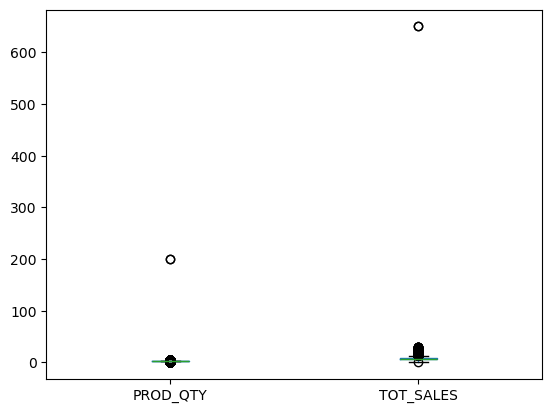

In [26]:
# Checking for outliers
df_transactions.boxplot(column=["PROD_QTY", "TOT_SALES"], grid=False)
plt.show()

In [27]:
# Removing outliers
threshold_product_qty = 50 
df_transactions = df_transactions[df_transactions['PROD_QTY'] <= threshold_product_qty]

##### Feature engineering

In [29]:
# Creating Unit Price column
df_transactions['unit_price'] =  df_transactions['TOT_SALES']/df_transactions['PROD_QTY']

In [30]:
# Creating Pack Size column

def extract_pack_size(product_name):
    product_name = str(product_name)
    match = re.search(r'(\d+)(g|G)', product_name) 
    return int(match.group(1)) if match else np.nan

df_transactions['pack_size'] = df_transactions['PROD_NAME'].apply(extract_pack_size)

In [31]:
df_transactions['brand'] = df_transactions['PROD_NAME'].str.split().str[0]

In [32]:
df_transactions['brand'].unique()

array(['Smiths', 'Pringles', 'CCs', 'Kettle', 'Thins', 'Infuzions',
       'GrnWves', 'RRD', 'Twisties', 'Red', 'Cheezels', 'Tostitos', 'WW',
       'Grain', 'Doritos', 'Cobs', 'Natural', 'Burger', 'Dorito',
       'Cheetos', 'Smith', 'French', 'NCC', 'Infzns', 'Sunbites',
       'Tyrrells', 'Snbts', 'Woolworths', nan], dtype=object)

In [33]:
# Brand name corrections

corrections = {'Red' : 'Red Rock Deli', 'RRD' : 'Red Rock Deli', 'Natural' : 'Natural Chip Company', 'NCC' : 'Natural Chip Company', 
                     'Woolworths' : 'Woolworths (WW)', 'WW' : 'Woolworths (WW)','Cobs' : 'Cobs Popped', 'Grain' : 'Grain Waves', 'Dorito' : 'Doritos',  
                     'Smith' : 'Smiths', 'French' : 'French Waves', 'Snbts' : 'Sunbites', 'Infzns' : 'Infuzions', 'GrnWves' : 'Grain Waves'}

def correct_brand(brand, corrections):
    return corrections.get(brand, brand)

df_transactions['brand'] = df_transactions['brand'].apply(lambda x: correct_brand(x, corrections))

### EDA for df_transactions 

##### Univariate Analysis

In [36]:
# Store count
store_count = df_transactions['STORE_NBR'].nunique()
print(f'Dataset contains information for {store_count} stores')

Dataset contains information for 272 stores


In [37]:
# Product count
product_count = df_transactions['PROD_NBR'].nunique()
print(f'Dataset contains information for {product_count} products')

Dataset contains information for 106 products


In [38]:
# Brand count
brand_count = df_transactions['brand'].nunique()
print(f'Dataset contains information for {brand_count} brands')

Dataset contains information for 20 brands


In [39]:
# Product quantity available
df_transactions['PROD_QTY'].unique()

array([2., 1., 3., 4., 5., 0.])

In [40]:
# Total sales in the given period 
total_sales = round(df_transactions['TOT_SALES'].sum(), 2)
print(f'Total sales is ${total_sales}')

Total sales is $1805171.7


In [41]:
# Transactions per day
transactions_count = df_transactions.groupby('date')['TXN_ID'].count()
transactions_count = transactions_count.reset_index()
transactions_count = transactions_count.rename(columns={'TXN_ID' : 'transactions_count'})

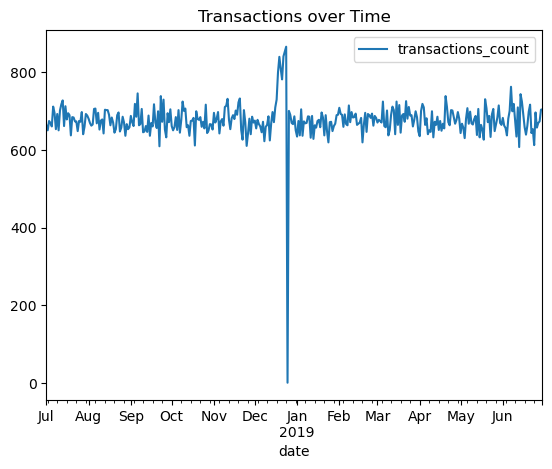

In [42]:
# Line graph for count of transaction per day
transactions_count.plot(x='date', y='transactions_count', kind='line', title='Transactions over Time')
plt.show()

A sudden drop in the last week of December is an anomaly.

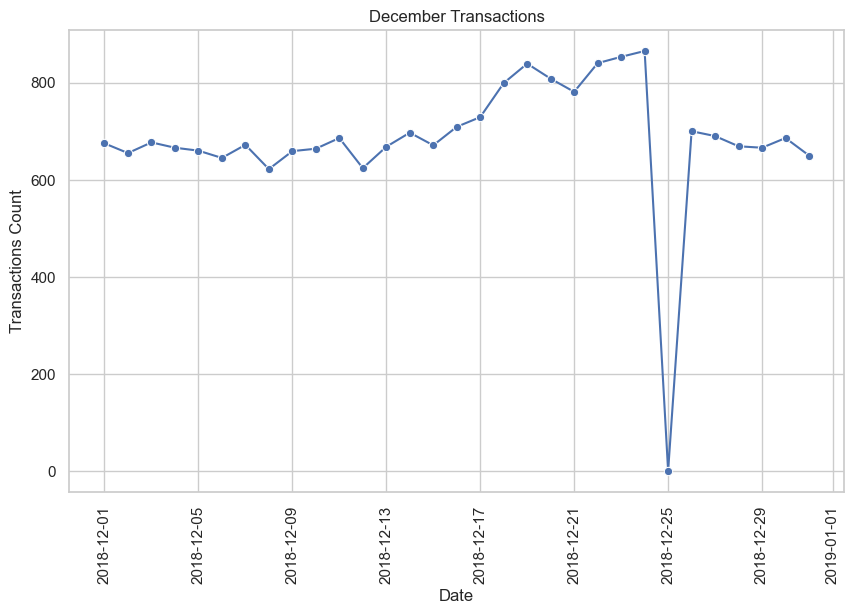

In [44]:
# Investigating the transactions in the month of december
december_transactions = transactions_count[transactions_count['date'].dt.month == 12]

# Plotting line graph for transactions in december
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.lineplot(data=december_transactions, x="date", y="transactions_count", marker='o')


plt.xlabel("Date")
plt.ylabel("Transactions Count")
plt.title("December Transactions")
plt.xticks(rotation=90)
plt.show()

There is an increase in the sales due as Chirstmas approches. And the sales for the 25th of December itself is 0 since all the stores were closed on the holiday.

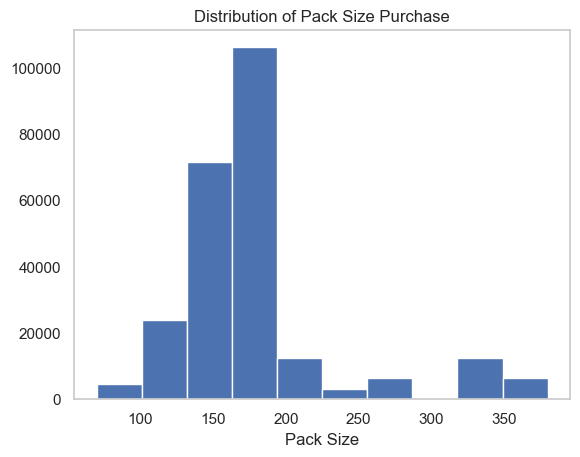

In [46]:
# Histogram of Pack Size Bought
plt.hist(df_transactions['pack_size'], density=False)

plt.title("Distribution of Pack Size Purchase")
plt.xlabel("Pack Size")
plt.grid(False)
plt.show()

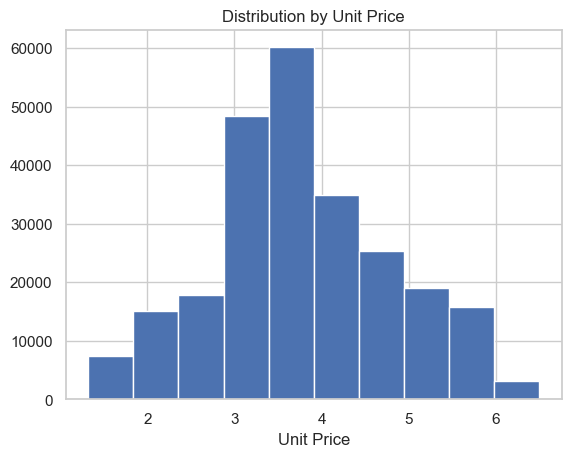

In [47]:
# Histogram of Unit Prices of Products Bought
plt.hist(df_transactions['unit_price'], density=False)

plt.title("Distribution by Unit Price")
plt.xlabel("Unit Price")
plt.show()

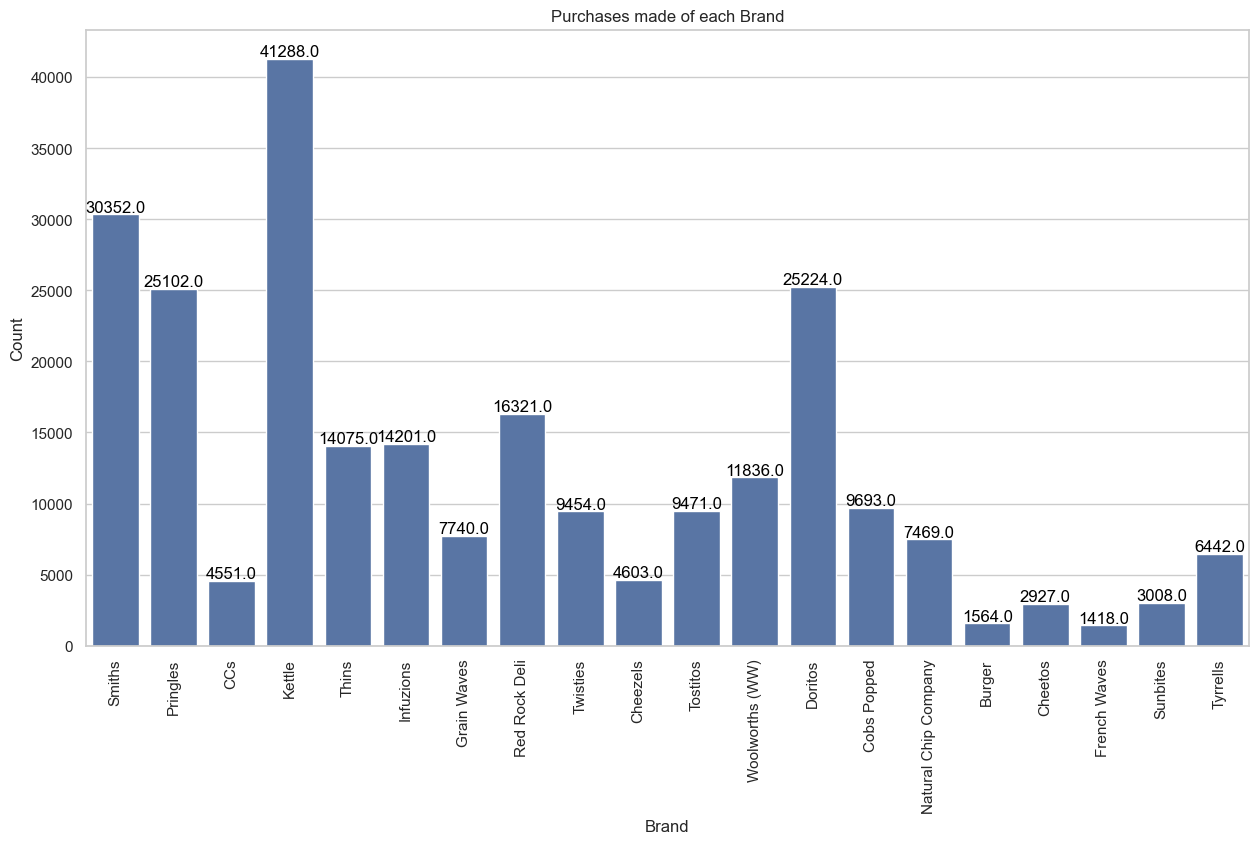

In [48]:
# Count plot to visualize the number of purchases per brand
plt.figure(figsize= (15, 8))
ax = sns.countplot(x='brand', data=df_transactions)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black',  
                xytext=(0, 5), textcoords='offset points')  

plt.xticks(rotation=90)
plt.title("Purchases made of each Brand")
plt.xlabel("Brand")
plt.ylabel("Count")

plt.show()

##### Bivariate Analysis

In [50]:
# Overall Sales Performance by Brand
sales_by_products = df_transactions.groupby(['brand'])['TOT_SALES'].sum().reset_index()
top_5_brands_by_sales = sales_by_products.sort_values(by=['TOT_SALES'], ascending=False).head(5)
bottom_5_brands_by_sales = sales_by_products.sort_values(by=['TOT_SALES'], ascending=True).head(6)

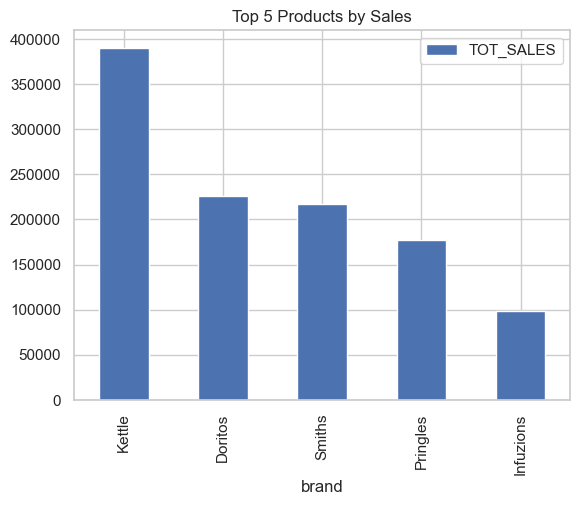

In [51]:
top_5_brands_by_sales.plot(x='brand', y='TOT_SALES', kind='bar', title='Top 5 Products by Sales')
plt.show()

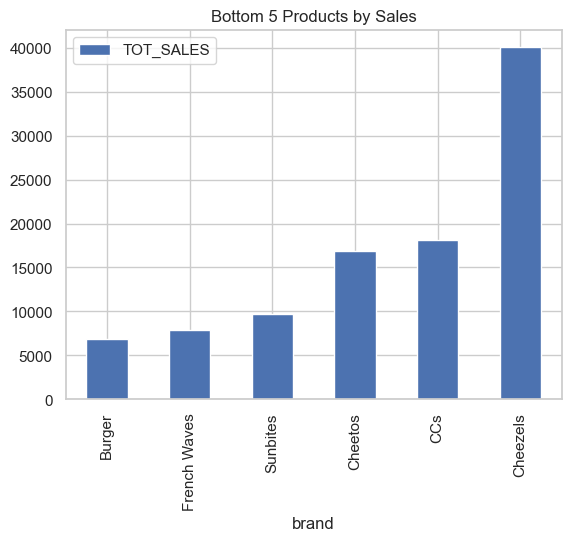

In [52]:
bottom_5_brands_by_sales.plot(x='brand', y='TOT_SALES', kind='bar', title='Bottom 5 Products by Sales')
plt.show()

## Purchase_behaviour Table

In [54]:
df_purchase_behaviour.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [55]:
df_purchase_behaviour.duplicated().sum()

0

In [56]:
# Renaming column for better understanding
df_purchase_behaviour.rename(columns={'PREMIUM_CUSTOMER' : 'customer_segment'}, inplace=True)

In [57]:
df_purchase_behaviour.shape

(72637, 3)

In [58]:
df_purchase_behaviour.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
customer_segment    0
dtype: int64

In [59]:
df_purchase_behaviour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   customer_segment  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


#### Data Wrangling and EDA for df_purchase_behaviour

##### Univariate Analysis

In [62]:
df_purchase_behaviour['LIFESTAGE'].unique()

array(['YOUNG SINGLES/COUPLES', 'YOUNG FAMILIES', 'OLDER SINGLES/COUPLES',
       'MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'RETIREES'], dtype=object)

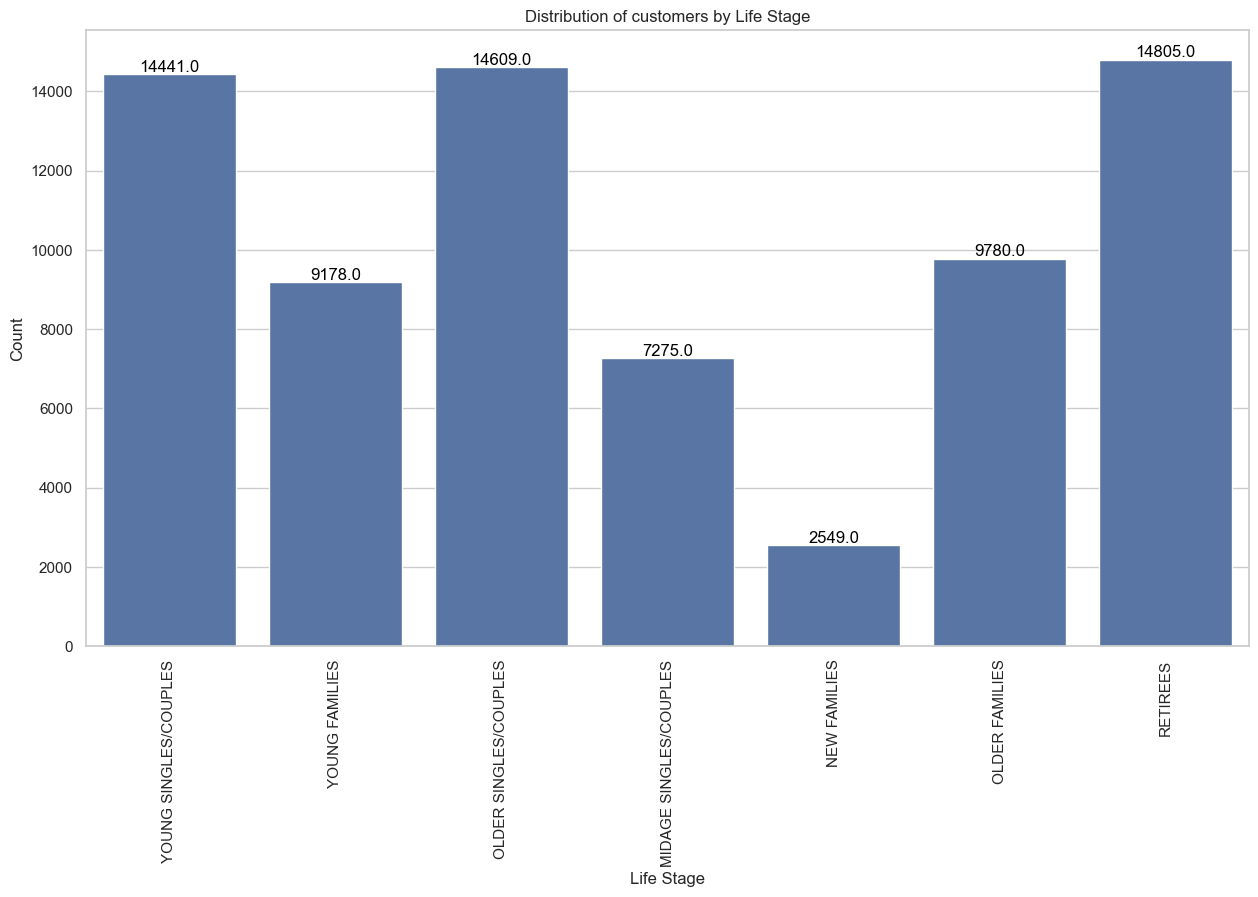

In [63]:
# Count of customers in each Life Stage
plt.figure(figsize= (15, 8))
ax = sns.countplot(x='LIFESTAGE', data=df_purchase_behaviour)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black',  
                xytext=(0, 5), textcoords='offset points')  

plt.xticks(rotation=90)
plt.title("Distribution of customers by Life Stage")
plt.xlabel("Life Stage")
plt.ylabel("Count")

plt.show()

In [64]:
df_purchase_behaviour['customer_segment'].unique()

array(['Premium', 'Mainstream', 'Budget'], dtype=object)

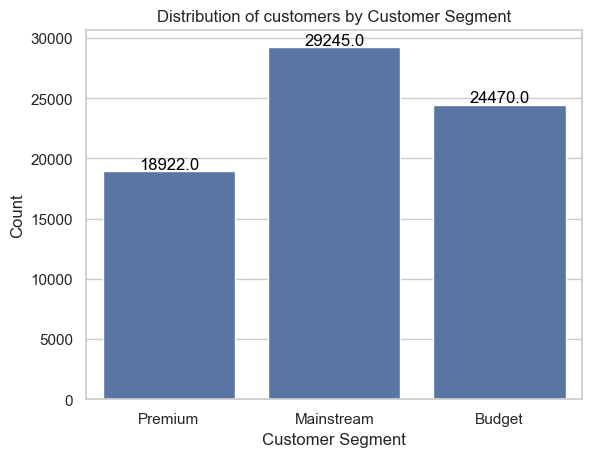

In [65]:
# Count of customers in each Customer Segment
ax = sns.countplot(x='customer_segment', data=df_purchase_behaviour)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',  
                (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', va='center', fontsize=12, color='black',  
                xytext=(0, 5), textcoords='offset points') 


plt.title("Distribution of customers by Customer Segment")
plt.xlabel("Customer Segment")
plt.ylabel("Count")

plt.show()

In [66]:
# Merged df_transactions and df_purchase_behaviour for sales analysis for customer segments
df_merged = pd.merge(df_transactions, df_purchase_behaviour, how='left')

In [67]:
df_merged['LIFESTAGE'].isnull().sum()

1

In [68]:
df_merged.head()

,date,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,unit_price,pack_size,brand,LIFESTAGE,customer_segment
0,2018-07-01,47.0,47142.0,42540.0,14.0,Smiths Crnkle Chip Orgnl Big Bag 380g,2.0,11.8,5.9,380.0,Smiths,MIDAGE SINGLES/COUPLES,Budget
1,2018-07-01,55.0,55073.0,48884.0,99.0,Pringles Sthrn FriedChicken 134g,2.0,7.4,3.7,134.0,Pringles,MIDAGE SINGLES/COUPLES,Budget
2,2018-07-01,55.0,55073.0,48884.0,91.0,CCs Tasty Cheese 175g,2.0,4.2,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
3,2018-07-01,58.0,58351.0,54374.0,102.0,Kettle Mozzarella Basil & Pesto 175g,2.0,10.8,5.4,175.0,Kettle,MIDAGE SINGLES/COUPLES,Budget
4,2018-07-01,68.0,68193.0,65598.0,44.0,Thins Chips Light& Tangy 175g,2.0,6.6,3.3,175.0,Thins,MIDAGE SINGLES/COUPLES,Budget


##### Bivariate Analysis

Defining metrices that'll help understand the cusstomer segments and thier purchasing behaviour:
- Who spends the most on chips (total sales), describing customers by life stage and how premium their general purchasing behaviour is?
- How many customers are in each segment?
- How many chips are bought per customer by segment?
- What’s the average chip price by customer segment?

In [71]:
# Finding sales by customer type(customer segment and life stage)
sales_by_customer_type = df_merged.groupby(['customer_segment', 'LIFESTAGE'])['TOT_SALES'].sum().reset_index()

In [72]:
# Proportion of sales of customers in different life stages based on the customer segment
sales_by_customer_type["sales_proportion"] = sales_by_customer_type.groupby("LIFESTAGE")["TOT_SALES"].transform(lambda x: x / x.sum())

In [73]:
# Pivoting df for visualization ease
sales_pivot = sales_by_customer_type.pivot(index="LIFESTAGE", columns="customer_segment", values="sales_proportion")

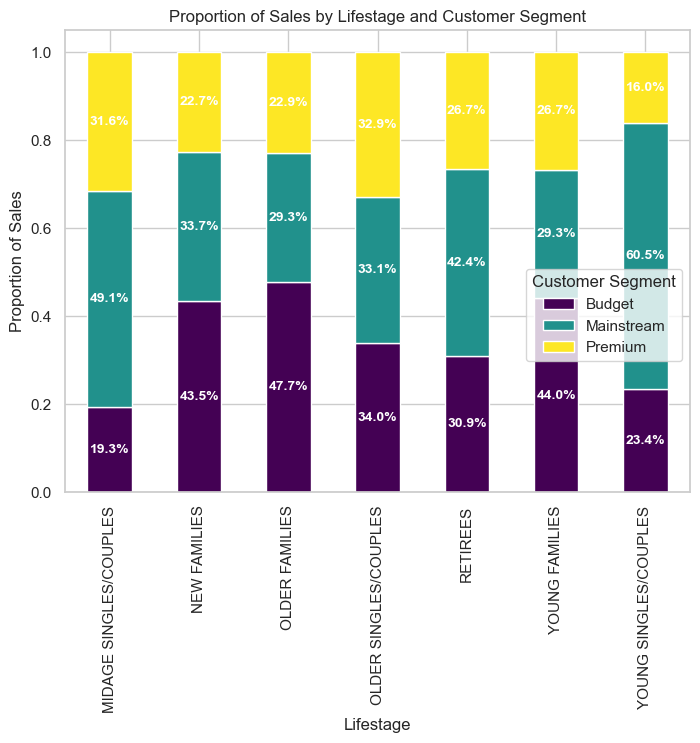

In [74]:
# Proportion of Sales by Lifestage and Customer Segment
fig, ax = plt.subplots(figsize=(10, 6))
fig = sales_pivot.plot(kind="bar", stacked=True, ax=ax, colormap="viridis").figure  

fig.subplots_adjust(right=0.75) 

for i, lifestage in enumerate(sales_pivot.index):
    cumulative_height = 0
    for customer_segment in sales_pivot.columns:
        height = sales_pivot.loc[lifestage, customer_segment]
        if height > 0:
            ax.text(i, cumulative_height + height / 2, f"{height:.1%}", 
                    ha="center", va="center", fontsize=10, color="white", fontweight="bold")
        cumulative_height += height

ax.set_xlabel("Lifestage")
ax.set_ylabel("Proportion of Sales")
ax.set_title("Proportion of Sales by Lifestage and Customer Segment")
ax.legend(title="Customer Segment", loc="upper right", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

plt.show()

Insights:
- **Mainstream Dominance Across Life Stages:**
    - The majority of sales come from Mainstream customers across all life stages, which aligns with the typical market behavior where mid-tier pricing attracts the broadest consumer base.
    - The highest proportion of Mainstream customers comes from Young Singles/Couples (60.5%).
    - Midage Singles/Couples (49.1%) follow, showing that middle-aged individuals continue to prefer mid-tier chip products. 
- **Budget Segment: Older Consumers' Preference:**
    - Older Singles/Couples (47.7%) have the highest proportion in the Budget segment, followed by Young Families (44.0%).   
- **Premium Segment is Niche, but Older Customers Show Interest:**
    - Premium segment sales are consistently lower across all life stages, implying that chips are not viewed as a premium-category product by most consumers.
    - However, Older Singles/Couples have the highest proportion in the Premium category (32.9%), suggesting that a niche group of older consumers prioritize premium chip brands, possibly due to perceived health benefits or brand loyalty.

In [76]:
# Number of customers by customer type(customer segment and life stage)
count_by_customer_type = df_merged.groupby(['customer_segment', 'LIFESTAGE'])['LYLTY_CARD_NBR'].count().reset_index(name='customer_count')

In [77]:
# Proportion of customers in different life stages based on the customer segment
count_by_customer_type["customer_proportion"] = count_by_customer_type.groupby("LIFESTAGE")["customer_count"].transform(lambda x: x / x.sum())

In [78]:
# Pivoting df for visualization ease
count_pivot = count_by_customer_type.pivot(index="LIFESTAGE", columns="customer_segment", values="customer_proportion")

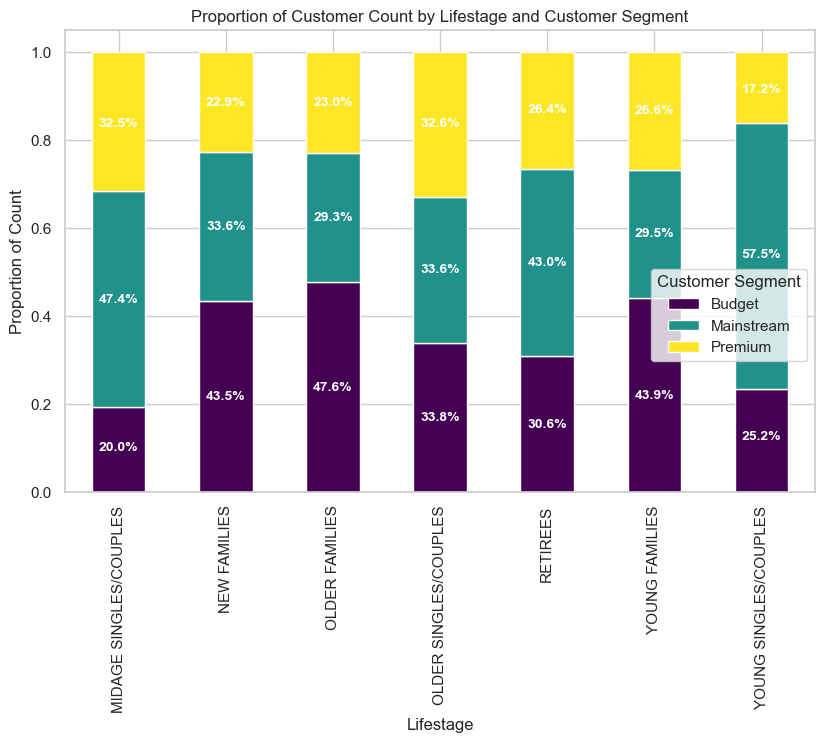

In [80]:
# Proportion of Sales by Lifestage and Customer Segment
fig, ax = plt.subplots(figsize=(12, 6))
fig = sales_pivot.plot(kind="bar", stacked=True, ax=ax, colormap="viridis").figure  

fig.subplots_adjust(right=0.75) 

for i, lifestage in enumerate(count_pivot.index):
    cumulative_height = 0
    for customer_segment in count_pivot.columns:
        height = count_pivot.loc[lifestage, customer_segment]
        if height > 0:
            ax.text(i, cumulative_height + height / 2, f"{height:.1%}", 
                    ha="center", va="center", fontsize=10, color="white", fontweight="bold")
        cumulative_height += height

ax.set_xlabel("Lifestage")
ax.set_ylabel("Proportion of Count")
ax.set_title("Proportion of Customer Count by Lifestage and Customer Segment")
ax.legend(title="Customer Segment", loc="upper right", bbox_to_anchor=(1, 0.5))
plt.xticks(rotation=90)

plt.show()

Insights:
- **Mainstream Segment (Largest Count):**
    - The largest share of buyers comes from Young Singles/Couples (57.5%), followed by Mid-Age Singles/Couples (47.4%).
    - This aligns with the earlier sales distribution insights, reinforcing that younger individuals and middle-aged singles are key mainstream consumers.
- **Budget Segment (Strong Presence in Families):**
    - Older Families (47.6%) and New Families (43.5%) are heavily represented in the Budget segment.
    - This suggests that households with dependents prioritize affordability, possibly buying in bulk or opting for lower-cost alternatives.
- **Premium Segment (Higher Interest Among Older Consumers):**
    - Mid-Age Singles/Couples (32.5%) and Older Singles/Couples (32.6%) contribute significantly to the Premium segment.


Higher sales may also be driven by more units of chips being bought per customer. Let's check it next. 

In [93]:
# Average Units per Customer by Segment in different life stages
avg_units = df_merged.groupby(['customer_segment', 'LIFESTAGE']).agg(
    AVG_UNITS=("PROD_QTY", "sum"), 
    UNIQUE_CUSTOMERS=("LYLTY_CARD_NBR", pd.Series.nunique)).reset_index()

avg_units['average_units_purchased'] = avg_units["AVG_UNITS"] / avg_units["UNIQUE_CUSTOMERS"]
avg_units = avg_units.sort_values(by="average_units_purchased", ascending=False)

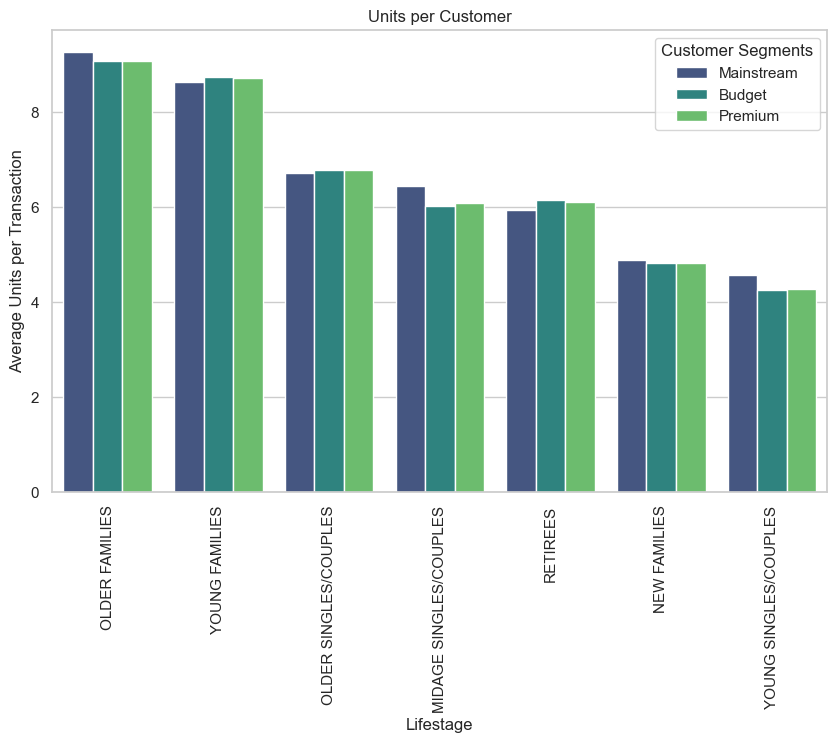

In [94]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_units, 
    x="LIFESTAGE", 
    y="average_units_purchased", 
    hue="customer_segment", 
    dodge=True,
    palette="viridis"
)


plt.xlabel("Lifestage")
plt.ylabel("Average Units per Transaction")
plt.title("Units per Customer")
plt.xticks(rotation=90)

# Show Final Plot
plt.legend(title="Customer Segments")
plt.show()

Insights:
- **Older Families and Young Families buy a higher number of chips per transaction across all customer segments.** This suggests that families with children or larger household sizes tend to buy in larger quantities/bulk, possibly due to frequent consumption by more people in the household.
- **Mid-Age Singles/Couples and Young Singles/Couples purchase with the mainstream category buying slightly more than the counterparts.** Although the Young Singles/Couples purchase the least number of the chips per transaction. This may indicate that younger and mid-age individuals, especially in the budget and premium segments, have lower snack consumption, possibly due to health-conscious choices or budget constraints.
- **Older Single/Couples and Retirees show a balanced purchase pattern, with budget and premium segments slightly preferring more units per transaction.** This could imply a preference for quality over quantity or budget-conscious buying behavior.
- **New Families display a consistent trend across all segments,** suggesting that their purchasing habits are stable and do not vary significantly based on pricing categories.

In [96]:
# Price Analysis by Customer Segment in different life stages
avg_unit_price = df_merged.groupby(['customer_segment', 'LIFESTAGE'])['unit_price'].mean().reset_index()
avg_unit_price.rename(columns={'unit_price' : 'average_unit_price'}, inplace=True)
avg_unit_price = avg_unit_price.sort_values(by="average_unit_price", ascending=False)

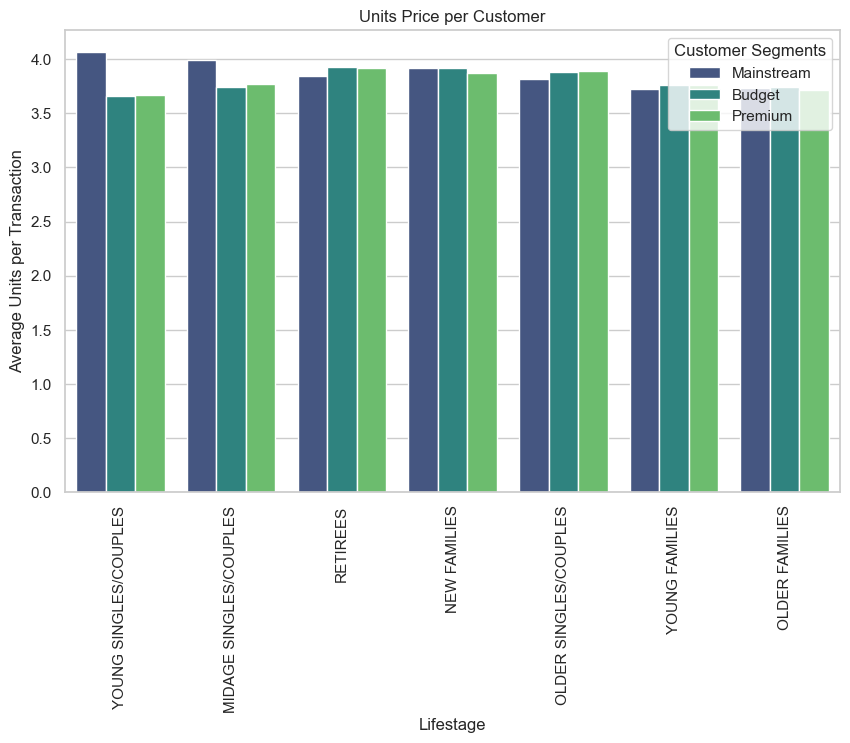

In [97]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=avg_unit_price, 
    x="LIFESTAGE", 
    y="average_unit_price", 
    hue="customer_segment", 
    dodge=True,
    palette="viridis"
)


plt.xlabel("Lifestage")
plt.ylabel("Average Units per Transaction")
plt.title("Units Price per Customer")
plt.xticks(rotation=90)

# Show Final Plot
plt.legend(title="Customer Segments")
plt.show()

Insights:
- **Young Singles/Couples and Mid Age Singles/Couples in the Mainstream customer segment are more willing to pay more per pack compared to their Budget and Premium counterparts.**
- **Premium customers across all life stages have a lower unit price per transaction.**
    - This could indicate that they either buy healthier alternatives (e.g., baked, organic, or gourmet snacks) which may not be included in the standard "chips" category or that they indulge in chips less frequently.
    - The trend is further supported by the observation that fewer Premium Young Singles/Couples and Mid-Age Singles/Couples purchase chips compared to their Mainstream counterparts.
- **Retirees, Older Singles/Couples, and Families (Young, Older and New) exhibit consistent spending behavior across all customer segments.**
    - This shows little price sensitivity for these customers.
    - However, the slight variations in pricing could indicate differences in pack sizes or preferred brands.

### t-test analysis
Performing a t-test analysis between mainstream vs premium and budget midage and young singles and couples

**Null Hypothesis(H₀):** The average price per unit paid by Mainstream customers is not significantly higher than that paid by Budget and Premium customers within the Young Singles/Couples and Mid-Age Singles/Couples life stages.

In [102]:
# Filtering target customers
filtered_df = df_merged[df_merged['LIFESTAGE'].isin(["YOUNG SINGLES/COUPLES", "MIDAGE SINGLES/COUPLES"])]

In [103]:
# Creating separate dfs for unit prices products bought by maintream customers vs others
mainstream_prices = filtered_df[filtered_df['customer_segment'] == 'Mainstream']['unit_price']
other_prices = filtered_df[filtered_df['customer_segment'] != 'Mainstream']['unit_price']

In [104]:
# Performing a t-test analysis
t_stat, p_value = stats.ttest_ind(mainstream_prices, other_prices, alternative='greater', equal_var=False)

mean_x = np.mean(mainstream_prices)
mean_y = np.mean(other_prices)
df = len(mainstream_prices) + len(other_prices) - 2 
confidence_interval = stats.t.ppf(0.95, df) * (np.std(mainstream_prices) / np.sqrt(len(mainstream_prices)))

In [105]:
print("Welch Two Sample t-test\n")
print(f"t = {t_stat:.2f}, df = {df}, p-value = {p_value:.2e}")
print("alternative hypothesis: true difference in means is greater than 0")
print(f"95 percent confidence interval: ({confidence_interval:.6f}, Inf)")
print("\nsample estimates:")
print(f"mean of x (Mainstream) = {mean_x:.6f}")
print(f"mean of y (Budget/Premium) = {mean_y:.6f}")

Welch Two Sample t-test

t = 37.62, df = 57365, p-value = 3.48e-306
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval: (0.009510, Inf)

sample estimates:
mean of x (Mainstream) = 4.039786
mean of y (Budget/Premium) = 3.706491


Insights:
- The high t-value (37.62) indicates a substantial difference between the means of the two group. With a large sample size and a degrees of freedom (df) of 57,365, the test results are highly reliable.

-  The lower bound (0.0095) suggests that, with 95% confidence, the true difference in means is at least 0.0095. Since the upper bound is infinity (Inf), it further confirms that the difference is positive.

- Therefore, we reject the null hypothesis (H₀) and confirm that the Young Singles/Couples and Mid-Age Singles/Couples life stages within the Mainstream customer segment pay significantly more per unit than Budget & Premium customers.

- Finally, the p-value (3.48e-306) is effectively 0, signifying that the difference is highly statistically significant.

### Understanding Target Customer's Purchase Behaviour and Preferences

We aim to target customer segments that contribute to the most sales to retain them or further increase sales. Let's look at Mainstream- Young Singles/Couples.

In [109]:
if p_value < 0.05:
    print("\nThe unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium customers.")
else:
    print("\nNo significant difference between the groups.")


The unit price for mainstream, young and mid-age singles and couples is significantly higher than that of budget or premium customers.


#### Mainstream: Young Singles/Counples 

#####  Brand affinity target customer segment compared to the rest of the customer segments

In [112]:
# Creadting dfs for deep dive into Mainstream, Young Singles/Counples customer segments for insights
segment_1 = df_merged[(df_merged['LIFESTAGE'] == 'YOUNG SINGLES/COUPLES') & (df_merged['customer_segment'] == 'Mainstream')] 
other = df_merged[(df_merged['LIFESTAGE'] != 'YOUNG SINGLES/COUPLES') & (df_merged['customer_segment'] != 'Mainstream')]

In [113]:
quantity_segment_1 = segment_1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

In [114]:
# Total Quantity bought by target vs other customers
quantity_segment_1_by_brand = segment_1.groupby('brand', as_index=False)['PROD_QTY'].sum()
quantity_segment_1_by_brand["target_segment"] = quantity_segment_1_by_brand['PROD_QTY'] / quantity_segment_1
quantity_segment_1_by_brand.drop('PROD_QTY', axis=1, inplace=True)

In [115]:
# Quantity bought of specific brands by target vs other customers
quantity_other_by_brand = other.groupby('brand', as_index=False)['PROD_QTY'].sum()
quantity_other_by_brand["other_segment"] = quantity_other_by_brand['PROD_QTY'] / quantity_other
quantity_other_by_brand.drop('PROD_QTY', axis=1, inplace=True)

In [116]:
# Calculating proportions of quantity bought in each brand by the target vs other customers
brand_proportions = pd.merge(quantity_segment_1_by_brand, quantity_other_by_brand, on='brand')

In [117]:
brand_proportions['affinity_to_brand'] = brand_proportions['target_segment'] / brand_proportions['other_segment']
brand_proportions = brand_proportions.sort_values(by='affinity_to_brand', ascending=False)
brand_proportions = brand_proportions.reset_index(drop=True)

In [118]:
brand_proportions

,brand,target_segment,other_segment,affinity_to_brand
0,Tyrrells,0.031553,0.025715,1.227016
1,Twisties,0.046184,0.037933,1.217496
2,Doritos,0.122761,0.101172,1.213388
3,Kettle,0.197985,0.166562,1.188658
4,Tostitos,0.045411,0.038351,1.184091
5,Pringles,0.119420,0.101111,1.181081
6,Cobs Popped,0.044638,0.038449,1.160950
7,Infuzions,0.064679,0.057410,1.126613
8,Thins,0.060373,0.057160,1.056209
9,Grain Waves,0.032712,0.031069,1.052887


Insight:
- Mainstream Young Singles/Couples are more likely to purchase Tyrrells (22%), Twisties and Doritos (both 21%), Kettle, Tostitos, Pringles (all 18%), Cobs Popped (16%), Infuzions (12%), chips compared to the rest of the population.
- Mainstream Young Singles/Couples are 56% less likely to buy Burger Rings and 51% to buy Woolworths(WW).

##### Preferred Pack Size of Mainstream, Young Singles/Counples customer segment compared to the rest of the customer segments

In [200]:
# Total Quantity bought by target vs other customers
quantity_segment_1_by_pack = segment_1.groupby('pack_size', as_index=False)['PROD_QTY'].sum()
quantity_segment_1_by_pack["target_segment"] = quantity_segment_1_by_pack['PROD_QTY'] / quantity_segment_1
quantity_segment_1_by_pack.drop('PROD_QTY', axis=1, inplace=True)

In [202]:
# Quantity bought of specific brands by target vs other customers
quantity_other_by_pack = other.groupby('pack_size', as_index=False)['PROD_QTY'].sum()
quantity_other_by_pack["other_segment"] = quantity_other_by_pack['PROD_QTY'] / quantity_other
quantity_other_by_pack.drop('PROD_QTY', axis=1, inplace=True)

In [204]:
# Calculating proportions of quantity bought in each brand by the target vs other customers
pack_proportions = pd.merge(quantity_segment_1_by_pack, quantity_other_by_pack, on='pack_size')

In [206]:
pack_proportions['affinity_to_pack'] = pack_proportions['target_segment'] / pack_proportions['other_segment']
pack_proportions = pack_proportions.sort_values(by='affinity_to_pack', ascending=False)
pack_proportions = pack_proportions.reset_index(drop=True)

In [208]:
pack_proportions

,pack_size,target_segment,other_segment,affinity_to_pack
0,270.0,0.031829,0.025070,1.269599
1,380.0,0.032160,0.025711,1.250818
2,330.0,0.061284,0.050975,1.202234
3,110.0,0.106280,0.089576,1.186483
4,134.0,0.119420,0.101111,1.181081
5,210.0,0.029124,0.024892,1.170011
6,135.0,0.014769,0.012932,1.142078
7,250.0,0.014355,0.012863,1.115951
8,170.0,0.080773,0.080348,1.005292
9,150.0,0.157598,0.163071,0.966441


Insights: 
- Mainstream Young Singles/Couples ( 26%)  are more likely to buy 270g packs compared to the rest of the population.

In [211]:
chips_product_list = df_merged.loc[df_merged['pack_size'] == 270, 'PROD_NAME'].unique()
print(chips_product_list)

['Twisties Chicken270g' 'Twisties Cheese     270g']


Twisties are the only brand offering 270g packs and this may be reflextive of the higher likelihood of preference towards Twisties. 

#### Mainstream: Mid-Age Singles/Counples 

In [215]:
# Creadting dfs for deep dive into Mainstream, Young Singles/Counples customer segments for insights
segment_1 = df_merged[(df_merged['LIFESTAGE'] == 'MIDAGE SINGLES/COUPLES') & (df_merged['customer_segment'] == 'Mainstream')] 
other = df_merged[(df_merged['LIFESTAGE'] != 'MIDAGE SINGLES/COUPLES') & (df_merged['customer_segment'] != 'Mainstream')]

In [217]:
quantity_segment_1 = segment_1['PROD_QTY'].sum()
quantity_other = other['PROD_QTY'].sum()

In [219]:
# Total Quantity bought by target vs other customers
quantity_segment_1_by_brand = segment_1.groupby('brand', as_index=False)['PROD_QTY'].sum()
quantity_segment_1_by_brand["target_segment"] = quantity_segment_1_by_brand['PROD_QTY'] / quantity_segment_1
quantity_segment_1_by_brand.drop('PROD_QTY', axis=1, inplace=True)

In [221]:
# Quantity bought of specific brands by target vs other customers
quantity_other_by_brand = other.groupby('brand', as_index=False)['PROD_QTY'].sum()
quantity_other_by_brand["other_segment"] = quantity_other_by_brand['PROD_QTY'] / quantity_other
quantity_other_by_brand.drop('PROD_QTY', axis=1, inplace=True)

In [223]:
# Calculating proportions of quantity bought in each brand by the target vs other customers
brand_proportions = pd.merge(quantity_segment_1_by_brand, quantity_other_by_brand, on='brand')

In [225]:
brand_proportions['affinity_to_brand'] = brand_proportions['target_segment'] / brand_proportions['other_segment']
brand_proportions = brand_proportions.sort_values(by='affinity_to_brand', ascending=False)
brand_proportions = brand_proportions.reset_index(drop=True)

In [227]:
brand_proportions

,brand,target_segment,other_segment,affinity_to_brand
0,Cobs Popped,0.044831,0.038362,1.168642
1,Kettle,0.192571,0.165383,1.164395
2,Twisties,0.043935,0.037806,1.162128
3,Tostitos,0.043558,0.038118,1.142733
4,Doritos,0.108895,0.100243,1.086320
5,Infuzions,0.061755,0.056921,1.084917
6,Tyrrells,0.026917,0.025577,1.052412
7,Cheezels,0.019846,0.018927,1.048552
8,Pringles,0.104181,0.100648,1.035106
9,Grain Waves,0.031962,0.030965,1.032187


Insight:
- Mainstream Mid-Age Singles/Couples are more likely to purchase  Cobs Popped, Kettle, Twisties (16%) and chips compared to the rest of the population.
- Mainstream Mid-Age Singles/Couples 51% less likely to purchase from Sunbites and 38% less likely to buy from Woolworths (WW). 

##### Preferred Pack Size of Mainstream, Young Singles/Counples customer segment compared to the rest of the customer segments

In [231]:
# Total Quantity bought by target vs other customers
quantity_segment_1_by_pack = segment_1.groupby('pack_size', as_index=False)['PROD_QTY'].sum()
quantity_segment_1_by_pack["target_segment"] = quantity_segment_1_by_pack['PROD_QTY'] / quantity_segment_1
quantity_segment_1_by_pack.drop('PROD_QTY', axis=1, inplace=True)

In [233]:
# Quantity bought of specific brands by target vs other customers
quantity_other_by_pack = other.groupby('pack_size', as_index=False)['PROD_QTY'].sum()
quantity_other_by_pack["other_segment"] = quantity_other_by_pack['PROD_QTY'] / quantity_other
quantity_other_by_pack.drop('PROD_QTY', axis=1, inplace=True)

In [235]:
# Calculating proportions of quantity bought in each brand by the target vs other customers
pack_proportions = pd.merge(quantity_segment_1_by_pack, quantity_other_by_pack, on='pack_size')

In [237]:
pack_proportions['affinity_to_pack'] = pack_proportions['target_segment'] / pack_proportions['other_segment']
pack_proportions = pack_proportions.sort_values(by='affinity_to_pack', ascending=False)
pack_proportions = pack_proportions.reset_index(drop=True)

In [239]:
pack_proportions

,pack_size,target_segment,other_segment,affinity_to_pack
0,270.0,0.030736,0.024848,1.236931
1,330.0,0.059728,0.050745,1.177023
2,110.0,0.102060,0.088903,1.147988
3,135.0,0.014519,0.012901,1.125439
4,210.0,0.027719,0.024762,1.119404
5,380.0,0.028426,0.025423,1.118122
6,134.0,0.104181,0.100648,1.035106
7,250.0,0.013199,0.012957,1.018680
8,175.0,0.268562,0.271644,0.988654
9,150.0,0.160420,0.162968,0.984366


Insights: 
- Mainstream Mid-Age Singles/Couples are 23% more likely to buy 270g pack compared to the rest of the population.
- Mainstream Mid-Age Singles/Couples also has 16% more affinity towards Twisties too.

## Conclusion

- The analysis highlights that Mainstream Young and Mid-Age Singles/Couples are the most valuable customer segments in the chip category. These groups contribute significantly more to both sales volume and unit price than their Budget and Premium counterparts, a finding confirmed through statistical testing (t-test, p-value ≈ 0). This suggests a clear opportunity for focused targeting.

- Customer behavior patterns further validate this segment's importance: they are more likely to purchase mid-tier chip brands like Tyrrells, Twisties, Kettle, and Doritos, and show a strong preference for 270g pack sizes, especially those offered by Twisties. Their higher spend per unit also suggests a willingness to pay more for preferred products, aligning with brand loyalty and value perception.

- While families (especially older and new) tend to buy in bulk and show strong representation in Budget segments, their price sensitivity and lower per-unit spend make them less ideal for premium positioning.

- These insights form a strong foundation for targeted marketing strategies, such as focused promotions on 270g packs of favored brands and tailored in-store placements to maximize visibility for this high-value customer group.

- **Maximize sales by strategically prioritizing high-affinity brands (Tyrrells, Twisties, Kettle, etc.) and the preferred 270g pack size through premium shelf placement, off-location displays near high-traffic areas, and tailored promotions to boost visibility, impulse buying, and volume among Young and Mid-Age Singles/Couples.**

The impact of the measures taken based on customer segement's preferences and behaviour to increase sales can further be evaluated to check the effectiveness of the measures.  